In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
def compare_weather_day_forecast(historical_df, forecast_df, date_column, value_column):
    """
    Compare historical weather data with the current forecast using a graph with a confidence interval.

    Parameters:
    - historical_df: DataFrame containing historical weather data.
    - forecast_df: DataFrame containing the current weather forecast data.
    - date_column: Name of the column in both DataFrames containing the date information.
    - value_column: Name of the column in both DataFrames containing the weather variable to compare.

    Returns:
    - None (the function will display the graph).
    """
    # Clean data and merge the two DataFrames on the date_column
    historical_df = historical_df.rename(columns={
        'date': 'validTime',
        'temperature_2m': 'temperature',
        'relative_humidity_2m': 'relativeHumidity',
        'dew_point_2m': 'dewpoint',
        'wind_speed_10m': 'windSpeed'
    })
    columns_to_drop = ['rain', 'Unnamed: 0']
    historical_data = historical_df.drop(columns=columns_to_drop, errors='ignore')
    historical_df['date'] = historical_df['validTime'].apply(
        lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m-%d")
    )
    
    columns_to_drop = ['windDirection', 'Unnamed: 0', 'minTemperature', 'maxTemperature']
    forecast_df = forecast_df.drop(columns=columns_to_drop, errors='ignore')
    forecast_df['date'] = forecast_df['validTime'].apply(
        lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S%z").strftime("%m-%d")
    )

    merged_df = pd.merge(historical_df, forecast_df, on=date_column, suffixes=('_historical', '_forecast'))

    sns.lineplot(x=merged_df[date_column], y=merged_df[value_column + '_historical'], label='Historical', ci=None, color='blue')

    # Add confidence interval around the historical line
    sns.lineplot(x=merged_df[date_column], y=merged_df[value_column + '_historical'], ci='sd', color='blue', alpha=0.2)

    # Plot the smooth line for forecast data
    sns.lineplot(x=merged_df[date_column], y=merged_df[value_column + '_forecast'], label='Forecast', ci='sd', color='red')

    # Set plot labels and title
    plt.xlabel('Date')
    plt.ylabel(value_column)
    plt.title(f'Comparison of Historical Data and Forecast for {value_column}')

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

# Example usage:
# historical_data = pd.read_csv('historical_weather.csv')
# forecast_data = pd.read_csv('forecast_weather.csv')
# compare_weather_forecast(historical_data, forecast_data, 'date', 'temperature')

In [4]:
historical_data = pd.read_csv(r'C:/Users/camer/Documents/Stat386/weather386/weather_history_csv/hourly_hist.csv')
forecast_data = pd.read_csv(r'C:/Users/camer/Documents/Stat386/weather386/forecast_csv/combined.csv')

C:\Users\camer\AppData\Local\Temp\ipykernel_11164\3803806875.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=merged_df[date_column], y=merged_df[value_column + '_historical'], label='Historical', ci=None, color='blue')
C:\Users\camer\AppData\Local\Temp\ipykernel_11164\3803806875.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x=merged_df[date_column], y=merged_df[value_column + '_historical'], ci='sd', color='blue', alpha=0.2)
C:\Users\camer\AppData\Local\Temp\ipykernel_11164\3803806875.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x=merged_df[date_column], y=merged_df[value_column + '_forecast'], label='Forecast', ci='sd', color='red')


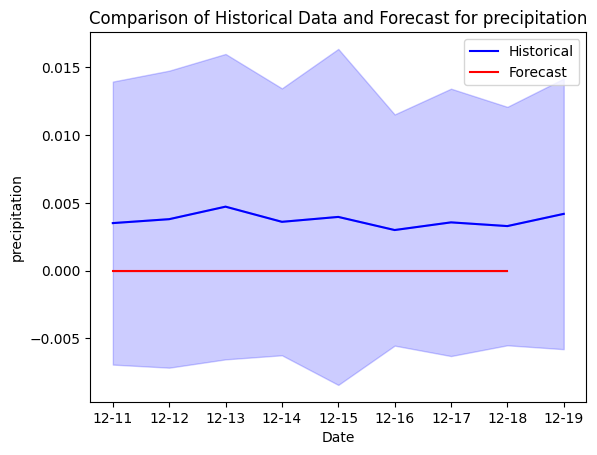

In [5]:
compare_weather_day_forecast(historical_data, forecast_data, 'date', 'precipitation')

In [6]:
def compare_weather_hour_forecast(historical_df, forecast_df, date_column, value_column, target_date):
    """
    Compare historical weather data with the current forecast using a graph with a confidence interval.

    Parameters:
    - historical_df: DataFrame containing historical weather data.
    - forecast_df: DataFrame containing the current weather forecast data.
    - date_column: Name of the column in both DataFrames containing the date information.
    - value_column: Name of the column in both DataFrames containing the weather variable to compare.
    - target_date: Date in the format 'MM-DD' to filter the data.

    Returns:
    - None (the function will display the graph).
    """
    # Clean data and merge the two DataFrames on the date_column
    historical_df = historical_df.rename(columns={
        'date': 'validTime',
        'temperature_2m': 'temperature',
        'relative_humidity_2m': 'relativeHumidity',
        'dew_point_2m': 'dewpoint',
        'wind_speed_10m': 'windSpeed'
    })
    columns_to_drop = ['rain', 'Unnamed: 0']
    historical_data = historical_df.drop(columns=columns_to_drop, errors='ignore')
    historical_df['date'] = historical_df['validTime'].apply(
        lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m-%d")
    )
    
    columns_to_drop = ['windDirection', 'Unnamed: 0', 'minTemperature', 'maxTemperature']
    forecast_df = forecast_df.drop(columns=columns_to_drop, errors='ignore')
    forecast_df['date'] = forecast_df['validTime'].apply(
        lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S%z").strftime("%m-%d")
    )

    # Filter data for the target date
    historical_df = historical_df[historical_df['date'] == target_date]
    forecast_df = forecast_df[forecast_df['date'] == target_date]

    # Extract hour from the validTime columns
    historical_df['hour'] = pd.to_datetime(historical_df['validTime']).dt.hour
    forecast_df['hour'] = pd.to_datetime(forecast_df['validTime']).dt.hour

    merged_df = pd.merge(historical_df, forecast_df, on=['date', 'hour'], suffixes=('_historical', '_forecast'))

    sns.lineplot(x=merged_df['hour'], y=merged_df[value_column + '_historical'], label='Historical', ci=None, color='blue')

    # Add confidence interval around the historical line
    sns.lineplot(x=merged_df['hour'], y=merged_df[value_column + '_historical'], ci='sd', color='blue', alpha=0.2)

    # Plot the smooth line for forecast data
    sns.lineplot(x=merged_df['hour'], y=merged_df[value_column + '_forecast'], label='Forecast', ci='sd', color='red')

    # Set plot labels and title
    plt.xlabel('Hour of the Day')
    plt.ylabel(value_column)
    plt.title(f'Comparison of Historical Data and Forecast for {value_column} on {target_date}')

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

# Example usage:
# historical_data = pd.read_csv('historical_weather.csv')
# forecast_data = pd.read_csv('forecast_weather.csv')
# compare_weather_day_forecast(historical_data, forecast_data, 'date', 'temperature', '12-11')


C:\Users\camer\AppData\Local\Temp\ipykernel_11164\934816885.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=merged_df['hour'], y=merged_df[value_column + '_historical'], label='Historical', ci=None, color='blue')
C:\Users\camer\AppData\Local\Temp\ipykernel_11164\934816885.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x=merged_df['hour'], y=merged_df[value_column + '_historical'], ci='sd', color='blue', alpha=0.2)
C:\Users\camer\AppData\Local\Temp\ipykernel_11164\934816885.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x=merged_df['hour'], y=merged_df[value_column + '_forecast'], label='Forecast', ci='sd', color='red')


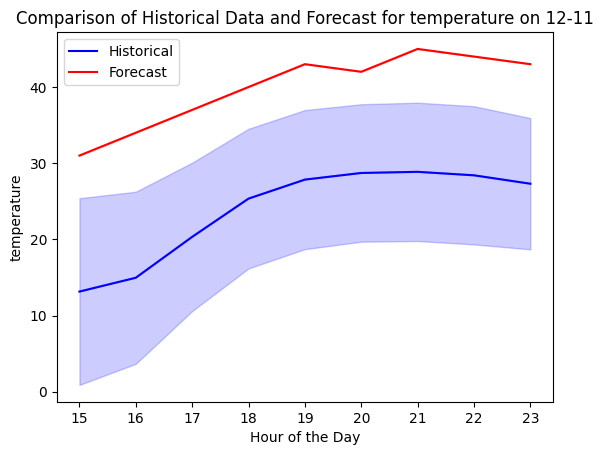

In [7]:
compare_weather_hour_forecast(historical_data, forecast_data, 'date', 'temperature', '12-11')


In [8]:
def default_graphs(historical_df, forecast_df, date_column = 'date', target_date = '12-11'):
    """
    Generate default weather comparison graphs for a specific date.

    Parameters:
    - historical_df: DataFrame containing historical weather data.
    - forecast_df: DataFrame containing the current weather forecast data.
    - date_column: Name of the column in both DataFrames containing the date information.
    - target_date: Date in the format 'MM-DD' to filter the data.

    Returns:
    - graph_list: List of generated graphs.
    """
    graph_list = []

    # Generate and show the first graph
    graph_list.append(compare_weather_day_forecast(historical_df, forecast_df, date_column, 'precipitation'))

    # Generate and show the second graph
    graph_list.append(compare_weather_hour_forecast(historical_df, forecast_df, date_column, 'windSpeed', target_date))

    # Generate and show the third graph
    graph_list.append(compare_weather_hour_forecast(historical_df, forecast_df, date_column, 'temperature', target_date))
    return graph_list

# Example usage:
# historical_data = pd.read_csv('historical_weather.csv')
# forecast_data = pd.read_csv('forecast_weather.csv')
# default_graphs(historical_data, forecast_data, 'date', '12-11')

C:\Users\camer\AppData\Local\Temp\ipykernel_11164\3803806875.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=merged_df[date_column], y=merged_df[value_column + '_historical'], label='Historical', ci=None, color='blue')
C:\Users\camer\AppData\Local\Temp\ipykernel_11164\3803806875.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x=merged_df[date_column], y=merged_df[value_column + '_historical'], ci='sd', color='blue', alpha=0.2)
C:\Users\camer\AppData\Local\Temp\ipykernel_11164\3803806875.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x=merged_df[date_column], y=merged_df[value_column + '_forecast'], label='Forecast', ci='sd', color='red')


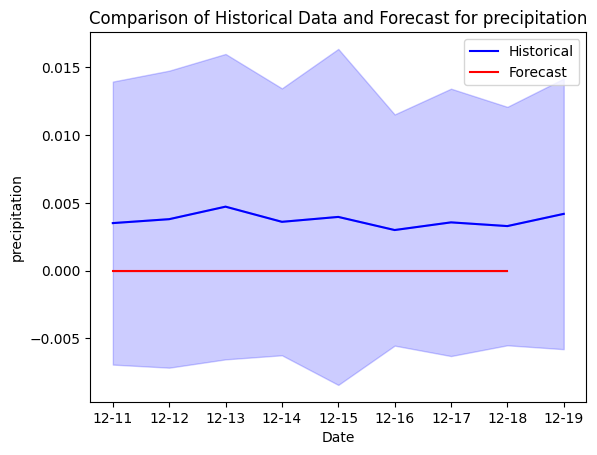

C:\Users\camer\AppData\Local\Temp\ipykernel_11164\934816885.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=merged_df['hour'], y=merged_df[value_column + '_historical'], label='Historical', ci=None, color='blue')
C:\Users\camer\AppData\Local\Temp\ipykernel_11164\934816885.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x=merged_df['hour'], y=merged_df[value_column + '_historical'], ci='sd', color='blue', alpha=0.2)
C:\Users\camer\AppData\Local\Temp\ipykernel_11164\934816885.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x=merged_df['hour'], y=merged_df[value_column + '_forecast'], label='Forecast', ci='sd', color='red')


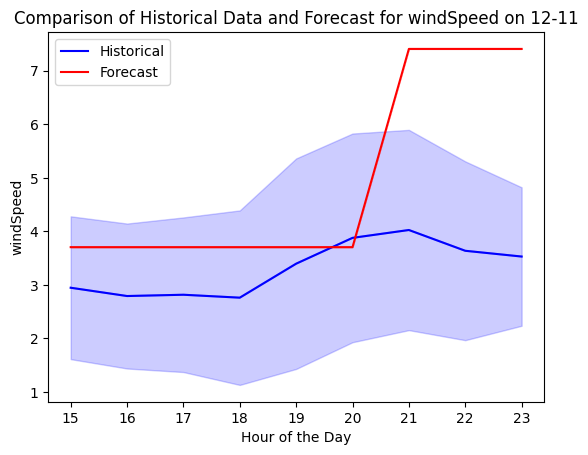

C:\Users\camer\AppData\Local\Temp\ipykernel_11164\934816885.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=merged_df['hour'], y=merged_df[value_column + '_historical'], label='Historical', ci=None, color='blue')
C:\Users\camer\AppData\Local\Temp\ipykernel_11164\934816885.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x=merged_df['hour'], y=merged_df[value_column + '_historical'], ci='sd', color='blue', alpha=0.2)
C:\Users\camer\AppData\Local\Temp\ipykernel_11164\934816885.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x=merged_df['hour'], y=merged_df[value_column + '_forecast'], label='Forecast', ci='sd', color='red')


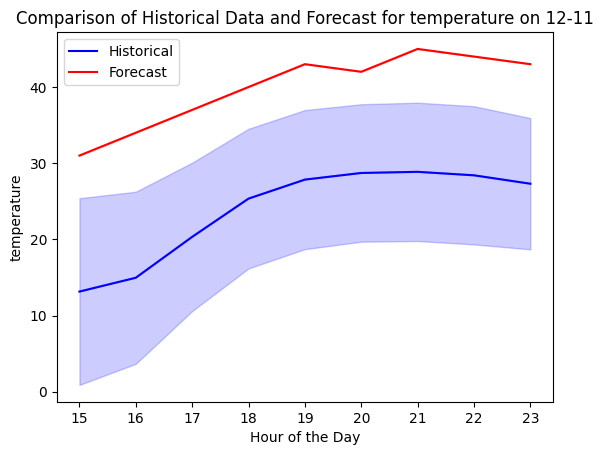

In [9]:
result = default_graphs(historical_data, forecast_data, 'date', '12-11')

In [11]:
result

[None, None, None]